**Weather Prediction Using Backpropagation**
<br>Description:
<br>1 = rain
<br>2 = sun
<br>3 = drizzle
<br>4 = snow
<br>5 = fog
<br> resource data : https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [2]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
cuaca = pd.read_excel('weather.xlsx')
print(cuaca)

Saving weather.xlsx to weather.xlsx
      temp_max  temp_min  wind  weather
0         12.8       5.0   4.7        3
1         10.6       2.8   4.5        1
2         11.7       7.2   2.3        1
3         12.2       5.6   4.7        1
4          8.9       2.8   6.1        1
...        ...       ...   ...      ...
1456       4.4       1.7   2.9        1
1457       5.0       1.7   1.3        1
1458       7.2       0.6   2.6        5
1459       5.6      -1.0   3.4        2
1460       5.6      -2.1   3.5        2

[1461 rows x 4 columns]


In [ ]:
x=cuaca.iloc[:,1:4].values #mengambil kolom temp_max, temp_min, wind
y=cuaca.iloc[:,-1].values #mengambil kolom weather

In [ ]:
from sklearn.model_selection import train_test_split
#datatest 20% dari total data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=70)

In [ ]:
#Import tf.keras.Sequential
import tensorflow as tf

model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=9, activation='relu', input_shape=(3,)))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 1ms/step - loss: 4.5949
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 3.9642
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 3.3685
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 2.7867
Epoch 5/200
23/23 [==============================] - 0s 1ms/step - loss: 2.2155
Epoch 6/200
23/23 [==============================] - 0s 1ms/step - loss: 1.6288
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 1.0724
Epoch 8/200
23/23 [==============================] - 0s 1ms/step - loss: 0.8070
Epoch 9/200
23/23 [==============================] - 0s 1ms/step - loss: 0.7403
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.7141
Epoch 11/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 12/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6677
Epoch 13/200
23/23 [=================

In [ ]:
#Simpan model backpropagation
model.save("model.cuaca")

INFO:tensorflow:Assets written to: model.cuaca/assets


In [ ]:
#Menampilkan Hasil Prediksi dan Data Aktual
hasil=model.predict(x_test)
print(x_test)
print(hasil)

[[ 1.1  7.7  2. ]
 [ 5.   4.1  1. ]
 [10.   2.9  2. ]
 ...
 [ 6.7  2.6  1. ]
 [ 8.9  4.3  1. ]
 [-0.6  4.2  4. ]]
[[1.9953604 ]
 [0.99632597]
 [1.996647  ]
 [0.99664474]
 [1.9936806 ]
 [0.99627256]
 [1.9970528 ]
 [1.995268  ]
 [2.0058343 ]
 [0.9969753 ]
 [2.0090685 ]
 [0.99779046]
 [0.9974191 ]
 [1.9966272 ]
 [0.99564767]
 [0.9967907 ]
 [0.99838513]
 [4.9891877 ]
 [1.996444  ]
 [1.9961786 ]
 [0.9962016 ]
 [2.9968894 ]
 [1.9958745 ]
 [0.9974231 ]
 [0.99699765]
 [4.98157   ]
 [1.9965897 ]
 [1.9969115 ]
 [2.0082397 ]
 [2.9959118 ]
 [1.996444  ]
 [1.9967567 ]
 [1.9970255 ]
 [2.0135717 ]
 [1.9920434 ]
 [0.9969047 ]
 [0.99688464]
 [0.99664485]
 [0.99561083]
 [1.9957618 ]
 [2.0166752 ]
 [0.9961789 ]
 [1.9958694 ]
 [0.9967182 ]
 [0.99755   ]
 [5.000408  ]
 [0.997209  ]
 [1.9957423 ]
 [1.9963492 ]
 [1.9957689 ]
 [2.9961948 ]
 [1.9965395 ]
 [0.99734646]
 [0.9969774 ]
 [1.9965    ]
 [1.9965546 ]
 [1.9533482 ]
 [1.9955574 ]
 [1.9955908 ]
 [0.9966775 ]
 [2.9958434 ]
 [1.9962053 ]
 [1.9807537 ]
 [1.

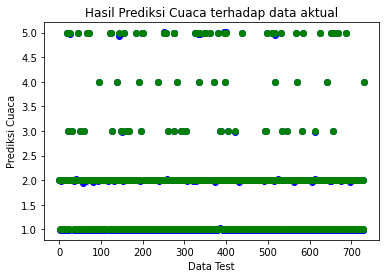

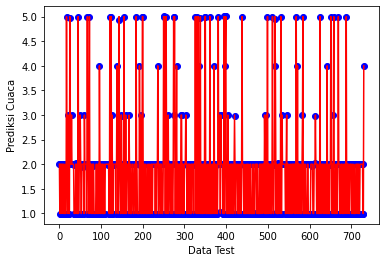

In [ ]:
import matplotlib.pyplot as plt

a=range(len(y_test))

plt.scatter(a, hasil, color='blue') #hasil prediksi
plt.scatter(a, y_test, color='green') #Data Aktual
plt.title("Hasil Prediksi Cuaca terhadap data aktual")
plt.xlabel("Data Test")
plt.ylabel("Prediksi Cuaca")
plt.show()

plt.scatter(a, hasil, color='blue') #hasil prediksi
plt.plot(a, y_test, color='red') #Data Aktual
plt.xlabel("Data Test")
plt.ylabel("Prediksi Cuaca")
plt.show()

In [ ]:
prev = input('Input Temperatur Maksimal: ')
high = input('Input Temperatur Minimal: ')
low = input('Input Angin: ')

closeprice=model.predict([[float(prev),float(high),float(low)]])
print('Cuaca hari ini adalah :')
print(closeprice)

Input Temperatur Maksimal: 12
Input Temperatur Minimal: 5
Input Angin: 3
Cuaca hari ini adalah :
[[2.9955826]]
